# KNN 귤, 오렌지 분류

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/citrus.csv -q

In [12]:
citrus = pd.read_csv('citrus.csv')

In [13]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [14]:
citrus.shape

(10000, 6)

In [15]:
citrus.columns

Index(['name', 'diameter', 'weight', 'red', 'green', 'blue'], dtype='object')

In [16]:
df['name'].value_counts()

orange        5000
grapefruit    5000
Name: name, dtype: int64

In [30]:
df['name']=df['name'].map({
                  'orange':1,
                  'grapefruit':2
})

In [31]:
citrus.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [32]:
X = df.drop(['name'], axis=1)
X.head()

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9


In [33]:
y = df['name']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: name, dtype: int64

In [34]:
X.shape, y.shape

((10000, 5), (10000,))

In [35]:
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [36]:
y

0       1
1       1
2       1
3       1
4       1
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: name, Length: 10000, dtype: int64

In [ ]:
# 테스트 데이터 분리

In [37]:
!pip install scikit-learn --user

In [38]:
from sklearn.utils import shuffle
shuffle(X, y)

[      diameter  weight  red  green  blue
 7400     11.38  196.51  142     59    14
 4839     10.86  187.04  156     67     2
 306       6.55  123.71  161     76     2
 7259     11.30  195.05  154     60     8
 5465      9.84  172.05  138     67    14
 ...        ...     ...  ...    ...   ...
 4385      9.93  175.09  161     86    19
 4376      9.91  174.97  162    101    10
 6087     10.53  182.24  158     74    14
 9871     13.86  234.80  156     66     2
 5870     10.34  179.18  147     74     7
 
 [10000 rows x 5 columns],
 7400    2
 4839    1
 306     1
 7259    2
 5465    2
        ..
 4385    1
 4376    1
 6087    2
 9871    2
 5870    2
 Name: name, Length: 10000, dtype: int64]

In [39]:
X, y = shuffle(X, y)

num = int(10000*0.8)

X_train = X.iloc[:num,:]   #8000
X_test = X.iloc[num:,:]    #2000
y_train = y.iloc[:num]     #8000
y_test = y.iloc[num:]      #2000

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 5) (2000, 5)
(8000,) (2000,)


In [40]:
mu = X_train['diameter'].mean()
std = X_train['diameter'].std()

mu, std

(9.97166125, 1.9420199362847832)

In [77]:
X_train['diameter'] = (X_train['diameter'] - mu)/std
print (X_train)

      diameter    weight       red     green      blue
9786 -4.190332  1.874248 -0.164240 -0.259221  0.833289
8602 -4.550882  1.128329  1.183866 -0.601484  0.833289
1379 -5.724643 -1.153726  0.220933  1.024263 -1.034857
6962 -4.837743  0.573575 -1.416053 -0.943746 -1.034857
9679 -4.256126  1.745442  0.606106 -0.943746  0.393726
...        ...       ...       ...       ...       ...
8094 -4.648257  0.957269 -0.934587  1.195395 -1.034857
5153 -5.343039 -0.492656  0.894986 -0.259221  0.393726
8629 -4.548250  1.138211 -0.260534 -1.029312  1.492635
158  -6.156250 -1.969500  1.376453 -0.173655 -1.034857
6327 -4.943013  0.337771 -1.319760 -1.286009  0.173944

[8000 rows x 5 columns]


In [42]:
X_train.head()

,diameter,weight,red,green,blue
2094,-0.896830,148.91,171,90,11
3338,-0.490037,160.86,164,80,19
9573,1.652063,223.61,144,75,18
1315,-1.164592,140.86,166,91,2
5871,0.189668,179.22,159,75,21


In [43]:
print(X_train.describe().T)

           count          mean        std         min         25%         50%  \
diameter  8000.0 -1.834088e-16   1.000000   -3.610499   -0.778396   -0.000855   
weight    8000.0  1.749840e+02  29.124653   86.760000  152.150000  174.890000   
red       8000.0  1.538765e+02  10.435929  115.000000  147.000000  154.000000   
green     8000.0  7.599412e+01  11.712909   31.000000   68.000000   76.000000   
blue      8000.0  1.134850e+01   9.061281    2.000000    2.000000   10.000000   

                 75%         max  
diameter    0.771536    3.335877  
weight    197.595000  261.510000  
red       161.000000  192.000000  
green      84.000000  116.000000  
blue       17.000000   56.000000  


In [44]:
type(X_train), type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [45]:
X_train = X_train.values
y_train = y_train.values

In [46]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [62]:
def get_citrus(mode=None):
    citrus = pd.read_csv('citrus.csv')
    citrus.columns = ['name', 'diameter', 'weight', 'red', 'green', 'blue']
       
    citrus['name']= citrus['name'].map({
        'orange':1,
        'grapefruit':2
    })
    X = df.drop(['name'], axis=1)
    y = df['name']

    X, y = shuffle(X, y)
    num = int(len(y)*0.8)        #len(y)=10000
   
    X_train = X.iloc[:num,:]     #8000
    X_test  = X.iloc[num:,:]     #2000
    y_train = y.iloc[:num]       #8000
    y_test  = y.iloc[num:]       #2000
   
    for col in X_train.columns:
        mu = X_train[col].mean()
        std = X_train[col].std()
        X_train[col] = (X_train[col] - mu)/std
        X_test[col] = (X_test[col] - mu)/std

    return X_train, X_test, y_train, y_test

In [63]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8000, 5) (2000, 5)
(8000,) (2000,)


In [78]:
X_train, X_test, y_train, y_test = get_citrus(mode="bin")

In [ ]:
#학습

In [135]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
#테스트

In [136]:
clf.score(X_test, y_test)

0.921

In [137]:
clf.score(X_train, y_train)

0.93925

In [ ]:
#예측

In [125]:
y_pred = clf.predict(X_test)

In [139]:
y_pred

array([1, 1, 2, ..., 2, 1, 2], dtype=int64)

In [138]:
y_test

668     1
3477    1
4846    1
145     1
1083    1
       ..
7755    2
8120    2
5781    2
1905    1
7976    2
Name: name, Length: 2000, dtype: int64

In [ ]:
# y_pred, y_test 정확도 계산

In [140]:
# 평가지표 metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print('accuraccy:', acc)
print('precision:', pre)
print('recall:', rec)

accuraccy: 0.9255
precision: 0.9060402684563759
recall: 0.9487951807228916


In [141]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
cfm

array([[945,  51],
       [ 98, 906]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

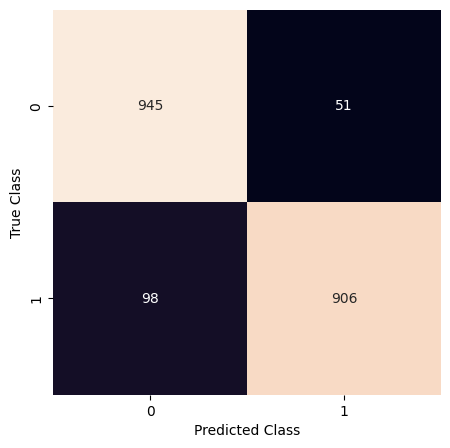

In [142]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cfm, fmt='d', annot=True, cbar=False)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show